<a href="https://colab.research.google.com/github/62Andrew48/Empresa/blob/master/Base_de_Datos_DANE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tabla de Frecuencias sobre "AyudaReligiosa(P26S5)"**

In [130]:
Base_Nueva <- read.csv("/content/CHC_base_anonimizada09-09-2021.csv")

# Para mirar la Base de Datos
Nueva_Base_Datos <- data.frame(Base_Nueva)
#View(Nueva_Base_Datos)

# Instalar y cargar las bibliotecas
install.packages(c("dplyr", "formattable")) # Asegúrate de tener instalados 'dplyr' y 'formattable'
library(dplyr)
library(formattable)

#--------------------INICIO DE LA TABLA DE FRECUENCIAS--------------------
print("TABLA DE FRECUENCIAS")
# Seleccionar solo la columna 'AyudaReligiosa(P26S5)'
datos_relevantes <- Nueva_Base_Datos %>% select(AyudaReligiosa = `P26S5`) # Asegúrate de usar el nombre correcto de la columna

# Crear la tabla de frecuencia
tabla_frecuencia_AyudaReligiosa <- datos_relevantes %>%
  group_by(AyudaReligiosa) %>%
  summarise(FrecuenciaAbsoluta = n()) %>%
  mutate(
    FrecuenciaRelativa = FrecuenciaAbsoluta / sum(FrecuenciaAbsoluta),
    FrecuenciaPorcentual = FrecuenciaRelativa * 100,
    FrecuenciaAbsolutaAcumulada = cumsum(FrecuenciaAbsoluta),
    FrecuenciaRelativaAcumulada = cumsum(FrecuenciaRelativa),
    FrecuenciaPorcentualAcumulada = cumsum(FrecuenciaPorcentual)
  ) %>%
  arrange(AyudaReligiosa)  # Ordenar por la variable 'AyudaReligiosa' si es

  # Renombrar las columnas en un paso separado
  tabla_frecuencia_AyudaReligiosa <- tabla_frecuencia_AyudaReligiosa %>%
    rename( # Aquí se renombran las columnas
           Intervalos = AyudaReligiosa,
           ni = FrecuenciaAbsoluta,
           hi = FrecuenciaRelativa,
           `%hi` = FrecuenciaPorcentual, # Usa comillas invertidas para nombres con caracteres especiales
           Ni = FrecuenciaAbsolutaAcumulada,
           Hi = FrecuenciaRelativaAcumulada,
           `%Hi` = FrecuenciaPorcentualAcumulada # Usa comillas invertidas para nombres con caracteres especiales
  )

# Mostrar la tabla de frecuencia con formattable
formattable(tabla_frecuencia_AyudaReligiosa)
#--------------------FIN DE LA TABLA DE FRECUENCIAS--------------------

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "TABLA DE FRECUENCIAS"


Intervalos,ni,hi,%hi,Ni,Hi,%Hi
<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,467,0.07472,7.472,467,0.07472,7.472
2,4876,0.78016,78.016,5343,0.85488,85.488
NA,907,0.14512,14.512,6250,1.00000,100.000


**Medidas de Posición y de Tendencia Central sobre "AyudaReligiosa(P26S5)"**

In [131]:
#--------------------INICIO DE LAS MEDIDAS DE POSICIÓN Y DE TENDENCIA CENTRAL--------------------
cat("\n")
print("MEDIDAS DE POSICIÓN Y DE TENDENCIA CENTRAL")
# Calcular la Media
media <- mean(Nueva_Base_Datos$`P26S5`, na.rm = TRUE)

# Imprimir la Media
print(paste("La Media es:", media))


# Encontrar la Moda
moda_AyudaReligiosa <- tabla_frecuencia_AyudaReligiosa$Intervalos[which.max(tabla_frecuencia_AyudaReligiosa$ni)]

# Imprimir la Moda
print(paste("La Moda es:", moda_AyudaReligiosa))

# Calcular la Mediana
mitad_frecuencia <- sum(tabla_frecuencia_AyudaReligiosa$ni) / 2
posicion_mediana <- which(tabla_frecuencia_AyudaReligiosa$Ni >= mitad_frecuencia)[1]
mediana_AyudaReligiosa <- tabla_frecuencia_AyudaReligiosa$Intervalos[posicion_mediana]

# Imprimir la Mediana
print(paste("La Mediana es:", mediana_AyudaReligiosa))
#--------------------FIN DE LAS MEDIDAS DE POSICIÓN Y DE TENDENCIA CENTRAL--------------------


[1] "MEDIDAS DE POSICIÓN Y DE TENDENCIA CENTRAL"
[1] "La Media es: 1.91259591989519"
[1] "La Moda es: 2"
[1] "La Mediana es: 2"


**Medidas de Dispersión sobre "AyudaReligiosa(P26S5)"**

In [132]:
#--------------------INICIO DE LAS MEDIDAS DE DISPERSIÓN--------------------
cat("\n")
print("MEDIDAS DE DISPERSIÓN")
# Calcular la Varianza Muestral
varianza_muestral <- var(Nueva_Base_Datos$`P26S5`, na.rm = TRUE)

# Imprimir la Varianza Muestral
print(paste("La Varianza Muestral es:", varianza_muestral))


# Calcular la Desviación Estándar Muestral
desviacion_estandar_muestral <- sd(Nueva_Base_Datos$`P26S5`, na.rm = TRUE)

# Imprimir la Desviación Estándar Muestral
print(paste("La Desviación Estándar Muestral es:", desviacion_estandar_muestral))


# Calcular el Coeficiente de Variación
coeficiente_variacion <- desviacion_estandar_muestral / media

# Imprimir el Coeficiente de Variación
print(paste("El Coeficiente de Variación es:", coeficiente_variacion))
cat("\n")
#--------------------FIN DE LAS MEDIDAS DE DISPERSIÓN--------------------

#--------------------INICIO DE OTRAS MEDIDAS DE DISPERSIÓN--------------------
# Cuartiles
   cuartiles <- quantile(Nueva_Base_Datos$`P26S5`, probs = c(0.25, 0.50, 0.75, 1), na.rm = TRUE)

   # Deciles
   deciles <- quantile(Nueva_Base_Datos$`P26S5`, probs = seq(0.1, 0.9, by = 0.1), na.rm = TRUE)

   # Percentiles (ejemplos: percentil 10, 25, 75, 90)
   percentiles <- quantile(Nueva_Base_Datos$`P26S5`, probs = c(0.10, 0.25, 0.75, 0.90), na.rm = TRUE)

print("CUARTILES")
# Calcular Cuartiles
cuartil_1 <- calcular_percentil(Nueva_Base_Datos$`P26S5`, 25)
cuartil_2 <- calcular_percentil(Nueva_Base_Datos$`P26S5`, 50)
cuartil_3 <- calcular_percentil(Nueva_Base_Datos$`P26S5`, 75)
cuartil_4 <- quantile(Nueva_Base_Datos$`P26S5`, probs = 1, na.rm = TRUE)

# Imprimir Cuartiles
print(paste("Cuartil 1:", cuartil_1))
print(paste("Cuartil 2:", cuartil_2))
print(paste("Cuartil 3:", cuartil_3))
print(paste("Cuartil 4:", cuartil_4))

cat("\n")
print("DECILES")
# Calcular Deciles
deciles <- quantile(Nueva_Base_Datos$`P26S5`, probs = seq(0.1, 1, by = 0.1), na.rm = TRUE)

# Imprimir Deciles
for (i in 1:length(deciles)) {
  print(paste("Decil", i, ":", deciles[i]))
}

cat("\n")
print("PERCENTILES")
# Calcular Percentiles (ejemplos: percentil 10, 25, 75, 90)
percentiles <- sapply(c(10, 25, 75, 90), function(p) calcular_percentil(Nueva_Base_Datos$`P26S5`, p))

# Imprimir Percentiles
for (i in 1:length(percentiles)) {
  print(paste("Percentil", c(10, 25, 75, 90)[i], ":", percentiles[i]))
}
#--------------------FIN DE OTRAS MEDIDAS DE DISPERSIÓN--------------------


[1] "MEDIDAS DE DISPERSIÓN"
[1] "La Varianza Muestral es: 0.0797795384857832"
[1] "La Desviación Estándar Muestral es: 0.282452719027067"
[1] "El Coeficiente de Variación es: 0.147680289437481"

[1] "CUARTILES"
[1] "Cuartil 1: 2"
[1] "Cuartil 2: 2"
[1] "Cuartil 3: 2"
[1] "Cuartil 4: 2"

[1] "DECILES"
[1] "Decil 1 : 2"
[1] "Decil 2 : 2"
[1] "Decil 3 : 2"
[1] "Decil 4 : 2"
[1] "Decil 5 : 2"
[1] "Decil 6 : 2"
[1] "Decil 7 : 2"
[1] "Decil 8 : 2"
[1] "Decil 9 : 2"
[1] "Decil 10 : 2"

[1] "PERCENTILES"
[1] "Percentil 10 : 2"
[1] "Percentil 25 : 2"
[1] "Percentil 75 : 2"
[1] "Percentil 90 : 2"


**Histograma de Frecuencias sobre "AyudaReligiosa(P26S5)"**

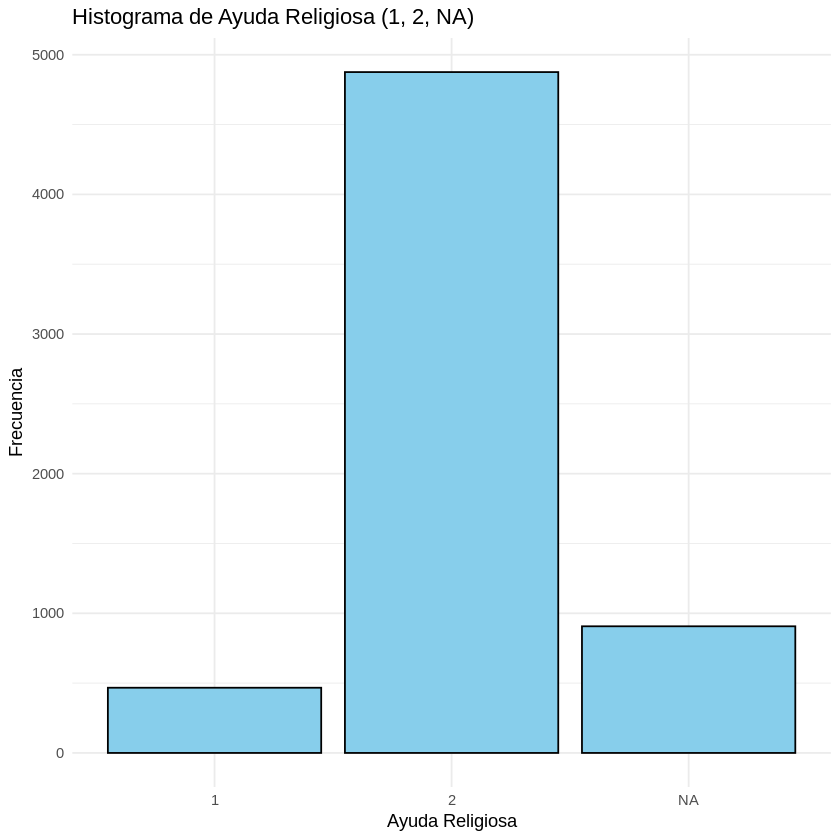

In [167]:
#--------------------INICIO DEL HISTOGRAMA DE FRECUENCIAS--------------------
# Instalar ggplot2
if (!require("ggplot2")) install.packages("ggplot2")

# Cargar ggplot2
library(ggplot2)

# Filtrar los datos para incluir solo las variables 1, 2 y NA
datos_filtrados <- tabla_frecuencia_AyudaReligiosa %>%
  filter(Intervalos %in% c(1, 2, NA))

# Crear el histograma
ggplot(datos_filtrados, aes(x = as.factor(Intervalos), y = ni)) +  # Convertir Intervalos a factor
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Ayuda Religiosa (1, 2, NA)",
       x = "Ayuda Religiosa", y = "Frecuencia") +
  theme_minimal()
#--------------------FIN DEL HISTOGRAMA DE FRECUENCIAS--------------------

**Polígono de Frecuencias sobre "AyudaReligiosa(P26S5)"**

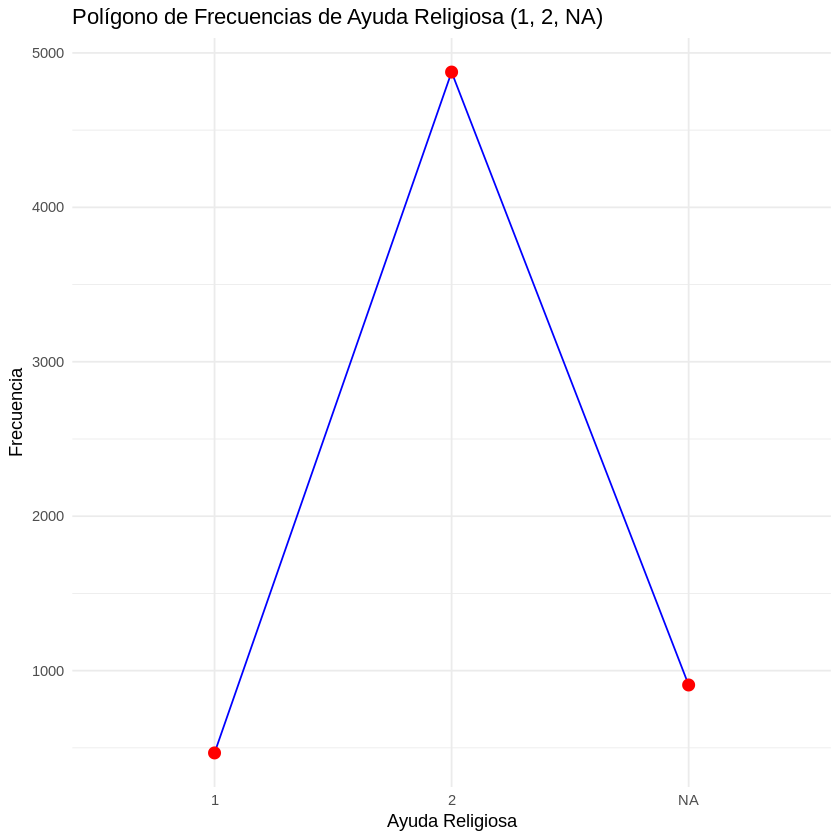

In [168]:
#--------------------INICIO DEL POLÍGONO DE FRECUENCIAS--------------------
# Instalar ggplot2
if (!require("ggplot2")) install.packages("ggplot2")

# Cargar ggplot2
library(ggplot2)

# Filtrar los datos para incluir solo las variables 1, 2 y NA
datos_filtrados <- tabla_frecuencia_AyudaReligiosa %>%
  filter(Intervalos %in% c(1, 2, NA))

# Crear el polígono de frecuencias
ggplot(datos_filtrados, aes(x = as.factor(Intervalos), y = ni)) +
  geom_line(aes(group = 1), color = "blue") +  # Conectar los puntos con una línea
  geom_point(color = "red", size = 3) +  # Agregar puntos para resaltar las frecuencias
  labs(title = "Polígono de Frecuencias de Ayuda Religiosa (1, 2, NA)",
       x = "Ayuda Religiosa", y = "Frecuencia") +
  theme_minimal()
#--------------------FIN DEL POLÍGONO DE FRECUENCIAS--------------------

**Ojiva de Frecuencias sobre "AyudaReligiosa(P26S5)"**

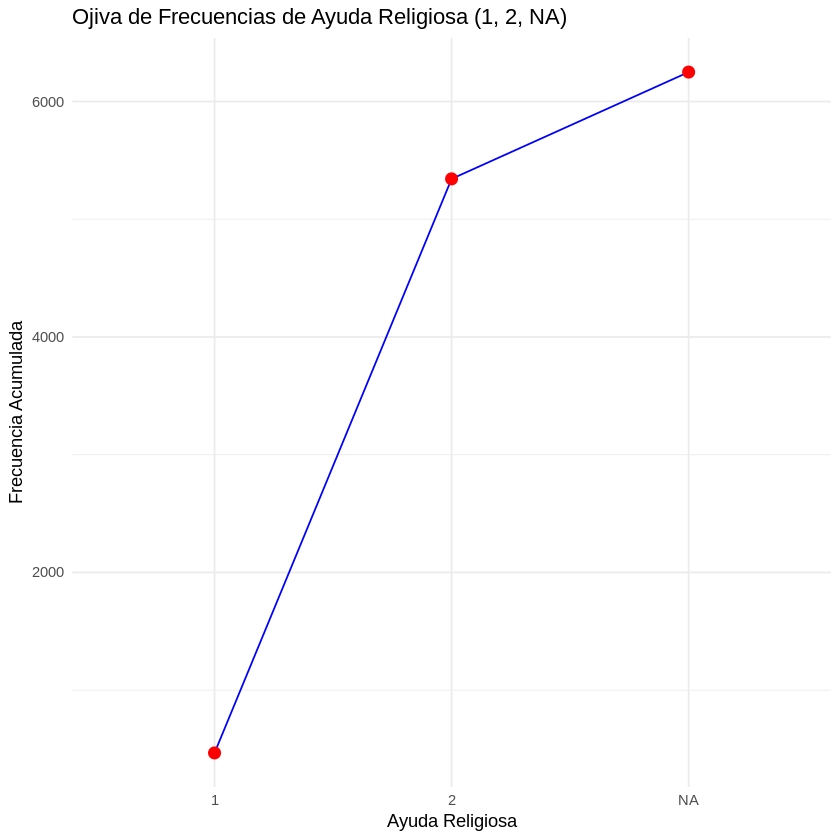

In [169]:
#--------------------INICIO DE LA OJIVA DE FRECUENCIAS--------------------
# Instalar ggplot2
if (!require("ggplot2")) install.packages("ggplot2")

# Cargar ggplot2
library(ggplot2)

# Filtrar los datos para incluir solo las variables 1, 2 y NA
datos_filtrados <- tabla_frecuencia_AyudaReligiosa %>%
  filter(Intervalos %in% c(1, 2, NA))

# Crear la ojiva de frecuencias
ggplot(datos_filtrados, aes(x = as.factor(Intervalos), y = Ni)) +
  geom_line(aes(group = 1), color = "blue") +  # Conectar los puntos con una línea
  geom_point(color = "red", size = 3) +  # Agregar puntos para resaltar las frecuencias
  labs(title = "Ojiva de Frecuencias de Ayuda Religiosa (1, 2, NA)",
       x = "Ayuda Religiosa", y = "Frecuencia Acumulada") +
  theme_minimal()
#--------------------FIN DE LA OJIVA DE FRECUENCIAS--------------------

**Tabla de Frecuencias sobre "FuentePrincipalAyuda(P26_1)"**

In [163]:
Base_Nueva <- read.csv("/content/CHC_base_anonimizada09-09-2021.csv")

# Para mirar la Base de Datos
Nueva_Base_Datos <- data.frame(Base_Nueva)
#View(Nueva_Base_Datos)

# Instalar y cargar las bibliotecas
install.packages(c("dplyr", "formattable")) # Asegúrate de tener instalados 'dplyr' y 'formattable'
library(dplyr)
library(formattable)

#--------------------INICIO DE LA TABLA DE FRECUENCIAS--------------------
print("TABLA DE FRECUENCIAS")
# Seleccionar solo la columna 'FuentePrincipalAyuda(P26_1)'
datos_relevantes <- Nueva_Base_Datos %>% select(FuentePrincipalAyuda = `P26_1`) # Asegúrate de usar el nombre correcto de la columna

# Crear la tabla de frecuencia
tabla_frecuencia_FuentePrincipalAyuda <- datos_relevantes %>%
  group_by(FuentePrincipalAyuda) %>%
  summarise(FrecuenciaAbsoluta = n()) %>%
  mutate(
    FrecuenciaRelativa = FrecuenciaAbsoluta / sum(FrecuenciaAbsoluta),
    FrecuenciaPorcentual = FrecuenciaRelativa * 100,
    FrecuenciaAbsolutaAcumulada = cumsum(FrecuenciaAbsoluta),
    FrecuenciaRelativaAcumulada = cumsum(FrecuenciaRelativa),
    FrecuenciaPorcentualAcumulada = cumsum(FrecuenciaPorcentual)
  ) %>%
  arrange(FuentePrincipalAyuda)  # Ordenar por la variable 'FuentePrincipalAyuda' si es

  # Renombrar las columnas en un paso separado
  tabla_frecuencia_FuentePrincipalAyuda <- tabla_frecuencia_FuentePrincipalAyuda %>%
    rename( # Aquí se renombran las columnas
           Intervalos = FuentePrincipalAyuda,
           ni = FrecuenciaAbsoluta,
           hi = FrecuenciaRelativa,
           `%hi` = FrecuenciaPorcentual, # Usa comillas invertidas para nombres con caracteres especiales
           Ni = FrecuenciaAbsolutaAcumulada,
           Hi = FrecuenciaRelativaAcumulada,
           `%Hi` = FrecuenciaPorcentualAcumulada # Usa comillas invertidas para nombres con caracteres especiales
  )

# Mostrar la tabla de frecuencia con formattable
formattable(tabla_frecuencia_FuentePrincipalAyuda)
#--------------------FIN DE LA TABLA DE FRECUENCIAS--------------------

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "TABLA DE FRECUENCIAS"


Intervalos,ni,hi,%hi,Ni,Hi,%Hi
<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,902,0.14432,14.432,902,0.14432,14.432
2,338,0.05408,5.408,1240,0.19840,19.840
3,427,0.06832,6.832,1667,0.26672,26.672
4,183,0.02928,2.928,1850,0.29600,29.600
5,335,0.05360,5.360,2185,0.34960,34.960
6,130,0.02080,2.080,2315,0.37040,37.040
NA,3935,0.62960,62.960,6250,1.00000,100.000


**Medidas de Posición y de Tendencia Central sobre "FuentePrincipalAyuda(P26_1)"**

In [165]:
#--------------------INICIO DE LAS MEDIDAS DE POSICIÓN Y DE TENDENCIA CENTRAL--------------------
cat("\n")
print("MEDIDAS DE POSICIÓN Y DE TENDENCIA CENTRAL")
# Calcular la Media
media <- mean(Nueva_Base_Datos$`P26_1`, na.rm = TRUE)

# Imprimir la Media
print(paste("La Media es:", media))


# Encontrar la Moda
moda_FuentePrincipalAyuda <- tabla_frecuencia_FuentePrincipalAyuda$Intervalos[which.max(tabla_frecuencia_FuentePrincipalAyuda$ni)]

# Imprimir la Moda
print(paste("La Moda es:", moda_FuentePrincipalAyuda))

# Calcular la Mediana
mitad_frecuencia <- sum(tabla_frecuencia_FuentePrincipalAyuda$ni) / 2
posicion_mediana <- which(tabla_frecuencia_FuentePrincipalAyuda$Ni >= mitad_frecuencia)[1]
mediana_FuentePrincipalAyuda <- median(Nueva_Base_Datos$`P26_1`, na.rm = TRUE)

# Imprimir la Mediana
print(paste("La Mediana es:", mediana_FuentePrincipalAyuda))
#--------------------FIN DE LAS MEDIDAS DE POSICIÓN Y DE TENDENCIA CENTRAL--------------------


[1] "MEDIDAS DE POSICIÓN Y DE TENDENCIA CENTRAL"
[1] "La Media es: 2.61166306695464"
[1] "La Moda es: NA"
[1] "La Mediana es: 2"


**Medidas de Dispersión sobre "FuentePrincipalAyuda(P26_1)"**

In [166]:
#--------------------INICIO DE LAS MEDIDAS DE DISPERSIÓN--------------------
cat("\n")
print("MEDIDAS DE DISPERSIÓN")
# Calcular la Varianza Muestral
varianza_muestral <- var(Nueva_Base_Datos$`P26_1`, na.rm = TRUE)

# Imprimir la Varianza Muestral
print(paste("La Varianza Muestral es:", varianza_muestral))


# Calcular la Desviación Estándar Muestral
desviacion_estandar_muestral <- sd(Nueva_Base_Datos$`P26_1`, na.rm = TRUE)

# Imprimir la Desviación Estándar Muestral
print(paste("La Desviación Estándar Muestral es:", desviacion_estandar_muestral))


# Calcular el Coeficiente de Variación
coeficiente_variacion <- desviacion_estandar_muestral / media

# Imprimir el Coeficiente de Variación
print(paste("El Coeficiente de Variación es:", coeficiente_variacion))
cat("\n")
#--------------------FIN DE LAS MEDIDAS DE DISPERSIÓN--------------------

#--------------------INICIO DE OTRAS MEDIDAS DE DISPERSIÓN--------------------
# Cuartiles
   cuartiles <- quantile(Nueva_Base_Datos$`P26_1`, probs = c(0.25, 0.50, 0.75, 1), na.rm = TRUE)

   # Deciles
   deciles <- quantile(Nueva_Base_Datos$`P26_1`, probs = seq(0.1, 0.9, by = 0.1), na.rm = TRUE)

   # Percentiles (ejemplos: percentil 10, 25, 75, 90)
   percentiles <- quantile(Nueva_Base_Datos$`P26_1`, probs = c(0.10, 0.25, 0.75, 0.90), na.rm = TRUE)

print("CUARTILES")
# Calcular Cuartiles
cuartil_1 <- calcular_percentil(Nueva_Base_Datos$`P26_1`, 25)
cuartil_2 <- calcular_percentil(Nueva_Base_Datos$`P26_1`, 50)
cuartil_3 <- calcular_percentil(Nueva_Base_Datos$`P26_1`, 75)
cuartil_4 <- quantile(Nueva_Base_Datos$`P26_1`, probs = 1, na.rm = TRUE)

# Imprimir Cuartiles
print(paste("Cuartil 1:", cuartil_1))
print(paste("Cuartil 2:", cuartil_2))
print(paste("Cuartil 3:", cuartil_3))
print(paste("Cuartil 4:", cuartil_4))

cat("\n")
print("DECILES")
# Calcular Deciles
deciles <- quantile(Nueva_Base_Datos$`P26_1`, probs = seq(0.1, 1, by = 0.1), na.rm = TRUE)

# Imprimir Deciles
for (i in 1:length(deciles)) {
  print(paste("Decil", i, ":", deciles[i]))
}

cat("\n")
print("PERCENTILES")
# Calcular Percentiles (ejemplos: percentil 10, 25, 75, 90)
percentiles <- sapply(c(10, 25, 75, 90), function(p) calcular_percentil(Nueva_Base_Datos$`P26_1`, p))

# Imprimir Percentiles
for (i in 1:length(percentiles)) {
  print(paste("Percentil", c(10, 25, 75, 90)[i], ":", percentiles[i]))
}
#--------------------FIN DE OTRAS MEDIDAS DE DISPERSIÓN--------------------


[1] "MEDIDAS DE DISPERSIÓN"
[1] "La Varianza Muestral es: 2.71818716386872"
[1] "La Desviación Estándar Muestral es: 1.64869256196197"
[1] "El Coeficiente de Variación es: 0.631280727909686"

[1] "CUARTILES"
[1] "Cuartil 1: 1"
[1] "Cuartil 2: 5"
[1] "Cuartil 3: 5"
[1] "Cuartil 4: 6"

[1] "DECILES"
[1] "Decil 1 : 1"
[1] "Decil 2 : 1"
[1] "Decil 3 : 1"
[1] "Decil 4 : 2"
[1] "Decil 5 : 2"
[1] "Decil 6 : 3"
[1] "Decil 7 : 3"
[1] "Decil 8 : 5"
[1] "Decil 9 : 5"
[1] "Decil 10 : 6"

[1] "PERCENTILES"
[1] "Percentil 10 : 3.59999999999991"
[1] "Percentil 25 : 1"
[1] "Percentil 75 : 5"
[1] "Percentil 90 : 2.20000000000027"


**Histograma de Frecuencias sobre "FuentePrincipalAyuda(P26_1)"**

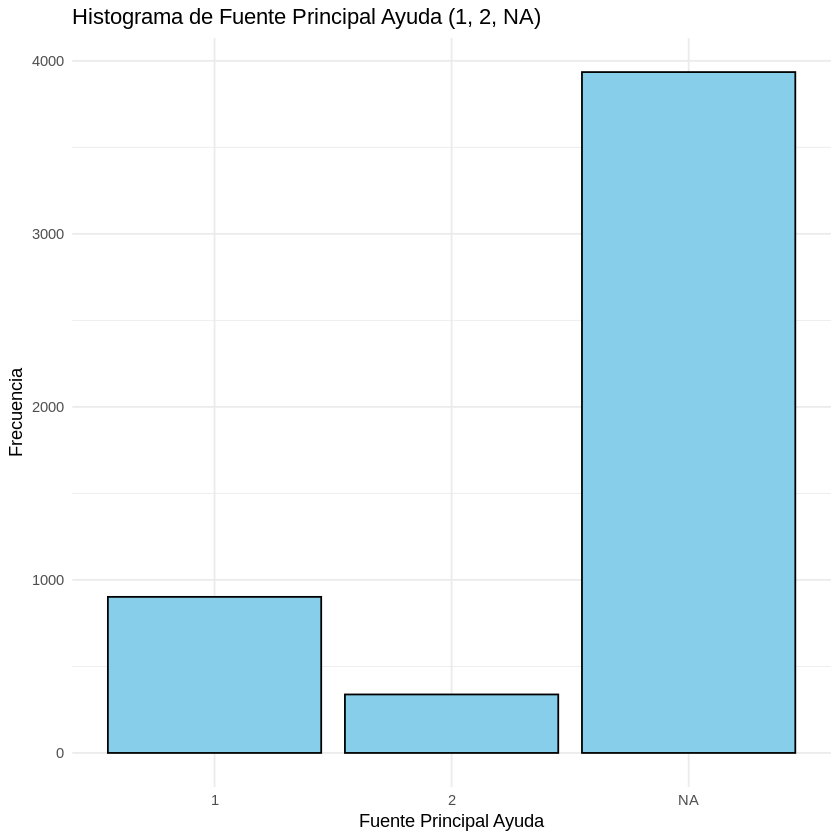

In [170]:
#--------------------INICIO DEL HISTOGRAMA DE FRECUENCIAS--------------------
# Instalar ggplot2
if (!require("ggplot2")) install.packages("ggplot2")

# Cargar ggplot2
library(ggplot2)

# Filtrar los datos para incluir solo las variables 1, 2 y NA
datos_filtrados <- tabla_frecuencia_FuentePrincipalAyuda %>%
  filter(Intervalos %in% c(1, 2, NA))

# Crear el histograma
ggplot(datos_filtrados, aes(x = as.factor(Intervalos), y = ni)) +  # Convertir Intervalos a factor
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Fuente Principal Ayuda (1, 2, NA)",
       x = "Fuente Principal Ayuda", y = "Frecuencia") +
  theme_minimal()
#--------------------FIN DEL HISTOGRAMA DE FRECUENCIAS--------------------

**Polígono de Frecuencias sobre "FuentePrincipalAyuda(P26_1)"**

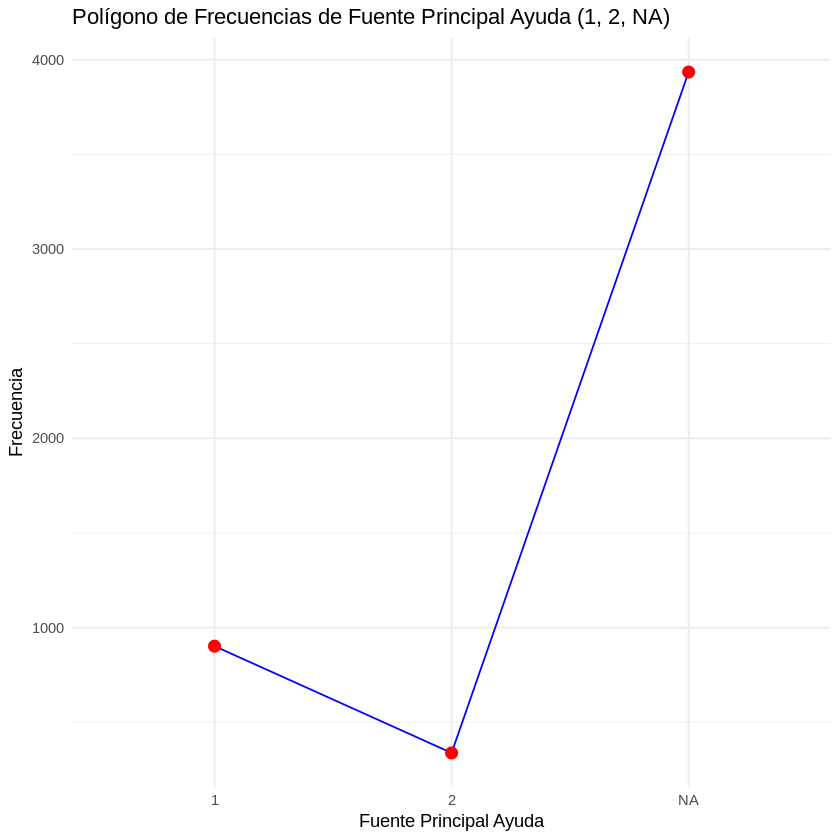

In [171]:
#--------------------INICIO DEL POLÍGONO DE FRECUENCIAS--------------------
# Instalar ggplot2
if (!require("ggplot2")) install.packages("ggplot2")

# Cargar ggplot2
library(ggplot2)

# Filtrar los datos para incluir solo las variables 1, 2 y NA
datos_filtrados <- tabla_frecuencia_FuentePrincipalAyuda %>%
  filter(Intervalos %in% c(1, 2, NA))

# Crear el polígono de frecuencias
ggplot(datos_filtrados, aes(x = as.factor(Intervalos), y = ni)) +
  geom_line(aes(group = 1), color = "blue") +  # Conectar los puntos con una línea
  geom_point(color = "red", size = 3) +  # Agregar puntos para resaltar las frecuencias
  labs(title = "Polígono de Frecuencias de Fuente Principal Ayuda (1, 2, NA)",
       x = "Fuente Principal Ayuda", y = "Frecuencia") +
  theme_minimal()
#--------------------FIN DEL POLÍGONO DE FRECUENCIAS--------------------

**Ojiva de Frecuencias sobre "FuentePrincipalAyuda(P26_1)"**

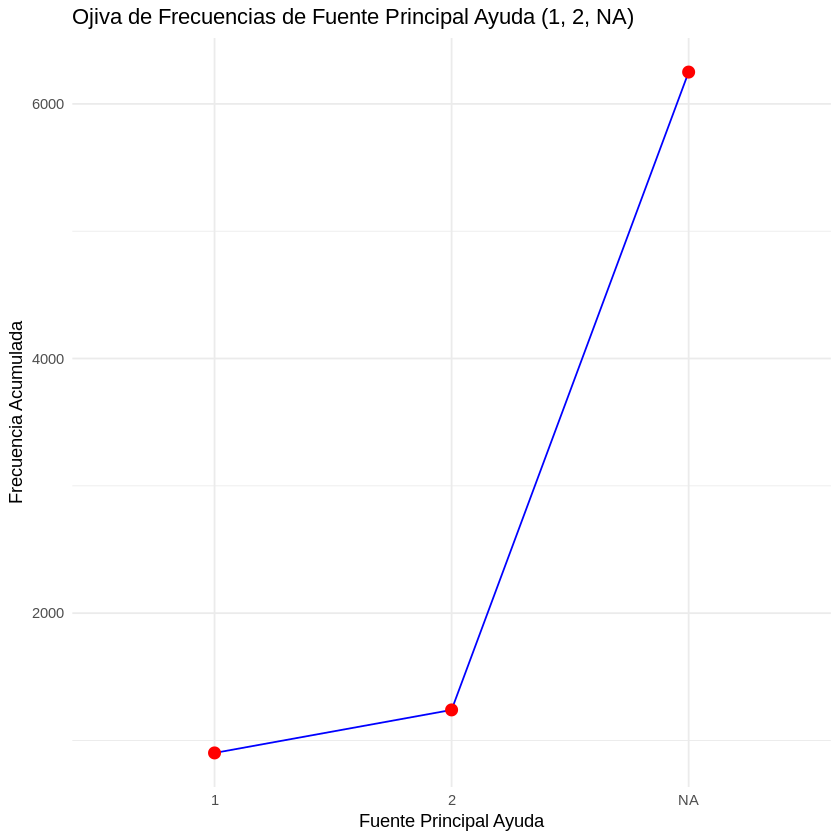

In [172]:
#--------------------INICIO DE LA OJIVA DE FRECUENCIAS--------------------
# Instalar ggplot2
if (!require("ggplot2")) install.packages("ggplot2")

# Cargar ggplot2
library(ggplot2)

# Filtrar los datos para incluir solo las variables 1, 2 y NA
datos_filtrados <- tabla_frecuencia_FuentePrincipalAyuda %>%
  filter(Intervalos %in% c(1, 2, NA))

# Crear la ojiva de frecuencias
ggplot(datos_filtrados, aes(x = as.factor(Intervalos), y = Ni)) +
  geom_line(aes(group = 1), color = "blue") +  # Conectar los puntos con una línea
  geom_point(color = "red", size = 3) +  # Agregar puntos para resaltar las frecuencias
  labs(title = "Ojiva de Frecuencias de Fuente Principal Ayuda (1, 2, NA)",
       x = "Fuente Principal Ayuda", y = "Frecuencia Acumulada") +
  theme_minimal()
#--------------------FIN DE LA OJIVA DE FRECUENCIAS--------------------